In [1]:
#  import of useful modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import ParameterGrid
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 19600)

In [3]:
path= "C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC/Flipkart"
files = os.listdir(path)
files


['flipkart_com-ecommerce_sample_1050.csv', 'Images']

In [4]:
Dict = {}
#  the dictionnary can contain all the csv files needed
for file in files:
    if file[-4:] == '.csv':
        Dict[file[:-4]] = pd.read_csv(os.path.join(os.path.abspath(path), file))
        # pd.read_scv must receive a path not only a name of a file !!

In [5]:
for name, data in Dict.items():
    # thanks to Ana I progressed
    # Displays name and head of each DataFrame
    print(name, "\n")
    display(data.head(10))
    print(f"Nombre d'individus: {data.shape[0]}, Nombre de features:{data.shape[1]}")

flipkart_com-ecommerce_sample_1050 



,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
5,893aa5ed55f7cff2eccea7758d7a86bd,2015-12-04 07:25:36 +0000,http://www.flipkart.com/maserati-time-r8851116...,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",WATEAYAHJ8CUCAYM,24400.0,24400.0,893aa5ed55f7cff2eccea7758d7a86bd.jpg,False,Maserati Time R8851116001 Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04 07:25:36 +0000,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
7,dd0e3470a7e6ed76fd69c2da27721041,2015-12-04 07:25:36 +0000,http://www.flipkart.com/t-star-uft-tsw-005-bk-...,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,"[""Watches >> Wrist Watches >> T STAR Wrist Wat...",WATECFFVGFZPAD3D,999.0,399.0,dd0e3470a7e6ed76fd69c2da27721041.jpg,False,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
8,41384da51732c0b4df3de8f395714fbb,2015-12-04 07:25:36 +0000,http://www.flipkart.com/alfajr-wy16b-youth-dig...,"Alfajr WY16B Youth Digital Watch - For Men, Boys","[""Watches >> Wrist Watches >> Alfajr Wrist Wat...",WATECHFU4QGFQEJG,5495.0,4995.0,41384da51732c0b4df3de8f395714fbb.jpg,False,"Alfajr WY16B Youth Digital Watc

Nombre d'individus: 1050, Nombre de features:15


In [6]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

EDA = Explorating Data Analysis

In [7]:
data = Dict["flipkart_com-ecommerce_sample_1050"]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [9]:
data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

# identify the main categories we plan to use as labels to plot T-SNE or PCA. 

In [10]:
listes = data.product_category_tree.unique().tolist()
categories  =[]
for tree in range(len(listes)):
    categories.append(listes[tree][:(listes[tree].find(">>"))])
set(categories)

{'["Baby Care ',
 '["Beauty and Personal Care ',
 '["Computers ',
 '["Home Decor & Festive Needs ',
 '["Home Furnishing ',
 '["Kitchen & Dining ',
 '["Watches '}

In [11]:
# Create a dictionnary for those categories
MycategoriesSet =  [(0 , '["Baby Care') ,
                (1, '["Beauty and Personal Care') ,
                (2,'["Computers'),
                (3,'["Home Decor & Festive Needs'),
                (4,'["Home Furnishing'),
                (5,'["Kitchen & Dining'), (6, '["Watches')]

In [12]:
len(MycategoriesSet)

7

In [13]:
MycategoriesSet[5][0]

5

In [14]:
MycategoriesSet[6]

(6, '["Watches')

In [15]:
for row in data.iterrows():
    if 'Baby Care' in data.product_category_tree.to_list():
        print('Yes')

In [16]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [17]:
ll =data.product_category_tree.tolist()
for i in range(len(ll)):
    for j in range(7):
        if ll[i].startswith(MycategoriesSet[j][1]):
            data.loc[i,"labels"] = MycategoriesSet[j][0]


In [18]:
for i in range(7):
    if MycategoriesSet[i][1] in data.loc[:,"product_category_tree"]:
        data['labels'] = MycategoriesSet[i][0]

In [19]:
data['labels'].value_counts()

4.0    150
0.0    150
6.0    150
3.0    150
5.0    150
1.0    150
2.0    150
Name: labels, dtype: int64

In [20]:
listes[3]

'["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]'

In [21]:
data.describe(include='object')

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,1050,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,1,889,889,11,22


In [22]:
data.description.apply(lambda n:len(n)).sort_values()
#  this is to calculate the nombers of words in each single item description.

877      109
890      109
1030     111
651      112
892      112
        ... 
589     2436
916     2529
715     2594
639     3447
437     3490
Name: description, Length: 1050, dtype: int64

In [23]:
data.head(20)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,labels
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",4.0
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",0.0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",0.0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",4.0
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",4.0
5,893aa5ed55f7cff2eccea7758d7a86bd,2015-12-04 07:25:36 +0000,http://www.flipkart.com/maserati-time-r8851116...,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",WATEAYAHJ8CUCAYM,24400.0,24400.0,893aa5ed55f7cff2eccea7758d7a86bd.jpg,False,Maserati Time R8851116001 Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",6.0
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04 07:25:36 +0000,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",6.0
7,dd0e3470a7e6ed76fd69c2da27721041,2015-12-04 07:25:36 +0000,http://www.flipkart.com/t-star-uft-tsw-005-bk-...,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,"[""Watches >> Wrist Watches >> T STAR Wrist Wat...",WATECFFVGFZPAD3D,999.0,399.0,dd0e3470a7e6ed76fd69c2da27721041.jpg,False,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",6.0
8,41384da51732c0b4df3de8f395714fbb,2015-12-04 07:25:36 +0000,http://www.flipkart.com/alfajr-wy16b-youth-dig...,"Alfajr WY16B Youth Digital Watch - For Men, Boys","[""Watches >> Wrist Watches >> Alfajr Wrist Wat...",WATECHFU4QGFQEJG,5495.0,4995.0,41384da51732c0b4df3de8f395714fbb.jpg

In [24]:
Cols = ['product_name', 'description', 'labels']
data = data[Cols]
data

,product_name,description,labels
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,4.0
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,0.0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,0.0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,4.0
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,4.0
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,0.0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,0.0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,0.0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,0.0


TOKENIZATION

In [25]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [26]:
doc= data.sample(10)
doc

,product_name,description,labels
903,BRANDWAGON DIGIPRINT Digital Reprint Painting,Key Features of BRANDWAGON DIGIPRINT Digital R...,3.0
923,"Pinc Ginger 90.6 inch Black, White Rice Lights","Buy Pinc Ginger 90.6 inch Black, White Rice Li...",3.0
160,Rockmantra Classic Vintage Black Car Ceramic Mug,Rockmantra Classic Vintage Black Car Ceramic M...,5.0
893,Durga Home Trendz Cotton Hand Towel,Durga Home Trendz Cotton Hand Towel (Hand Towe...,4.0
156,Printland PMBA1872 Ceramic Mug,Printland PMBA1872 Ceramic Mug (350 ml)\r\n ...,5.0
240,Kosher Kadhai 5 L,Buy Kosher Kadhai 5 L for Rs.592 online. Koshe...,5.0
758,Bajya Abstract Single Quilts & Comforters Mult...,Buy Bajya Abstract Single Quilts & Comforters ...,4.0
241,Recon SuperChef Kadhai,Buy Recon SuperChef Kadhai for Rs.715 online. ...,5.0
943,"Al Fakher Pegs'N'Pipes Mint, Double Apple Hook...","Buy Al Fakher Pegs'N'Pipes Mint, Double Apple ...",3.0
448,3kFactory Baby Shower Cap- Purple,Key Features of 3kFactory Baby Shower Cap- Pur...,0.0


In [27]:
for idx, ser  in doc.iterrows():
    txt_output = f"Product : {ser['product_name']}\n"
    print(txt_output + ser['description'] + "..." + "\n\n")

Product : BRANDWAGON DIGIPRINT Digital Reprint Painting
Key Features of BRANDWAGON DIGIPRINT Digital Reprint Painting 1 HD paintings,BRANDWAGON DIGIPRINT Digital Reprint Painting (18 inch x 12 inch) Price: Rs. 180 Home is the first thing that comes to mind when you think of comfort and a perfect ambience is what sets it right. So let your creativity for home decor fly free with Flipkart?s collection of home furnishing items that can transform your house into the home you have always dreamt of.,Specifications of BRANDWAGON DIGIPRINT Digital Reprint Painting (18 inch x 12 inch) General Brand BRANDWAGON Shape Rectangular Frame Material no framing Model Number POS0081 Frame Included No Painting Type Digital Reprint Model Name DIGIPRINT Painting Theme Modern Art Wall Mount Yes Frame Color no framing Artist Name avasthi Dimensions Weight 0.04 kg Height 18 inch Other Dimensions Dummy, Dummy Width 12 inch Warranty Covered in Warranty Warranty of the product is limited to manufacturing defects 

In [28]:
Mydata_description = data['description'].sample(3).to_numpy()
Mydata_description =  Mydata_description[2].lower()
Mydata_description

'buy rajo raja magan buddha artpiece showpiece  -  20.5 cm for rs.1799 online. rajo raja magan buddha artpiece showpiece  -  20.5 cm at best prices with free shipping & cash on delivery. only genuine products. 30 day replacement guarantee.'

In [29]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer

First tokenizer = word_tokenize

In [30]:
def display_tokens_info(tokens):
    """ display info about corpus"""
    print(f'Nb of tokens : {len(tokens)}, nb of single tokens : {len(set(tokens))}')
    print(tokens[:30])

In [31]:
tokens = word_tokenize (Mydata_description)
len(tokens)
tokens

['buy',
 'rajo',
 'raja',
 'magan',
 'buddha',
 'artpiece',
 'showpiece',
 '-',
 '20.5',
 'cm',
 'for',
 'rs.1799',
 'online',
 '.',
 'rajo',
 'raja',
 'magan',
 'buddha',
 'artpiece',
 'showpiece',
 '-',
 '20.5',
 'cm',
 'at',
 'best',
 'prices',
 'with',
 'free',
 'shipping',
 '&',
 'cash',
 'on',
 'delivery',
 '.',
 'only',
 'genuine',
 'products',
 '.',
 '30',
 'day',
 'replacement',
 'guarantee',
 '.']

In [32]:
display_tokens_info(tokens)

Nb of tokens : 43, nb of single tokens : 31
['buy', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '-', '20.5', 'cm', 'for', 'rs.1799', 'online', '.', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '-', '20.5', 'cm', 'at', 'best', 'prices', 'with', 'free', 'shipping', '&']


In [33]:
tokens = wordpunct_tokenize (Mydata_description)
display_tokens_info(tokens)

Nb of tokens : 49, nb of single tokens : 33
['buy', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '-', '20', '.', '5', 'cm', 'for', 'rs', '.', '1799', 'online', '.', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '-', '20', '.', '5', 'cm', 'at']


Stopwords

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
display_tokens_info(tokens)

Nb of tokens : 44, nb of single tokens : 28
['buy', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '-', '20', '.', '5', 'cm', 'rs', '.', '1799', 'online', '.', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '-', '20', '.', '5', 'cm', 'best', 'prices']


Second Tokenizer = RegexpTokenizer

In [36]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(Mydata_description)
display_tokens_info(tokens) 

Nb of tokens : 39, nb of single tokens : 30
['buy', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '20', '5', 'cm', 'for', 'rs', '1799', 'online', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '20', '5', 'cm', 'at', 'best', 'prices', 'with', 'free', 'shipping', 'cash']


In [37]:
tokens = [word for word in tokens if word not in stop_words]
display_tokens_info(tokens)

Nb of tokens : 34, nb of single tokens : 25
['buy', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '20', '5', 'cm', 'rs', '1799', 'online', 'rajo', 'raja', 'magan', 'buddha', 'artpiece', 'showpiece', '20', '5', 'cm', 'best', 'prices', 'free', 'shipping', 'cash', 'delivery', 'genuine', 'products']


In [38]:
Sentence = "Demain, dès l'aube, je+partirai, vois-tu je ne puis demeurer loin de toi plus longtemps."
Sentence2 = " Pourquoi un chien très moche, un cheval lourdement fourbu, un rat*auraient-ils la vie, Et toi si belle, chatoiement sage, plus un souffle ? Tu ne reviendras plus, Jamais, jamais, jamais, jamais, jamais ! "

## Essais

In [39]:
Xanadu = "In Xanadu did Kubla Khan A stately pleasure-dome decree:Where Alph, the sacred river, ran Through caverns measureless to man Down to a sunless sea. So twice five miles of fertile groundWith walls and towers were girdled round; And there were gardens bright with sinuous rills, where blossomed many an incense-bearing tree; And here were forests ancient as the hills, Enfolding sunny spots of greenery."

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
tokenizer = RegexpTokenizer(r"\w+")
# Sentence.replace('-', ' ')
tokens = tokenizer.tokenize(Sentence2)
Sentence2.lower()

' pourquoi un chien très moche, un cheval lourdement fourbu, un rat*auraient-ils la vie, et toi si belle, chatoiement sage, plus un souffle ? tu ne reviendras plus, jamais, jamais, jamais, jamais, jamais ! '

In [42]:
def stop_word_filter_fct(list_words) :
    adverbs = []
    filtered_w = [w for w in list_words if not w in stop_words]
    # filtered_w2 = [w for w in filtered_w if len(w) > 2]
    filtered_w3 = nltk.pos_tag(filtered_w)
    for t in range(len(filtered_w3)):
        if filtered_w3[t][1] == 'RB':
            adverbs.append(filtered_w3[t][0])
        filtered_w = [w for w in filtered_w if not w in adverbs ]

    return filtered_w

In [43]:
tokens = tokenizer.tokenize(Xanadu)
len(tokens)

67

In [44]:
XANADUfiltered = stop_word_filter_fct(tokens)
len(XANADUfiltered)
# XANADUfiltered

45

 ## A function to prepare a document to be processed in a bag of words

In [45]:
tokenizer = RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def display_tokens_info(tokens):
    """ display info about corpus"""
    print(f'Nb of tokens : {len(tokens)}, nb of single tokens : {len(set(tokens))}')
    print(tokens[:30])

def stop_word_filter_fct(list_words) :
    adverbs = []
    filtered_w = [w for w in list_words if not w in stop_words]
    # filtered_w2 = [w for w in filtered_w if len(w) > 2]
    filtered_w3 = nltk.pos_tag(filtered_w)
    for t in range(len(filtered_w3)):
        if filtered_w3[t][1] == 'RB':
            adverbs.append(filtered_w3[t][0])
        filtered_w = [w for w in filtered_w if not w in adverbs ]

    return filtered_w

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w
     
def transform_for_bagging (tokenizer,
                            document,
                            rejoin=False) :

    document = document.lower().strip()
    # Strip to remove space at the beginning and at the end of the document
        
    tokens = tokenizer.tokenize(document)
    display_tokens_info(tokens)

    tokens_filtered = stop_word_filter_fct(tokens)
    display_tokens_info(tokens)

    tokens_filtered_lemmatised  = lemma_fct(tokens_filtered)

    if rejoin:
        return " ".join(tokens_filtered_lemmatised)
    return tokens_filtered_lemmatised

In [46]:
data_filtered = pd.DataFrame()
data_filtered['description'] = data["description"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=True))
data_filtered['product_name'] = data["product_name"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=True))

Nb of tokens : 236, nb of single tokens : 132
['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'in', 'height', 'pack', 'of', '2', 'price', 'rs', '899', 'this']
Nb of tokens : 236, nb of single tokens : 132
['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'in', 'height', 'pack', 'of', '2', 'price', 'rs', '899', 'this']
Nb of tokens : 74, nb of single tokens : 48
['specifications', 'of', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'features', 'machine', 'washable', 'yes', 'material', 'cotton', 'design', 'self', 'design', 'general', 'brand', 'sathiyas', 'type', 'bath', 'towel', 'gsm']
Nb of toke

In [47]:
data_filtered

,description,product_name
0,key feature elegance polyester multicolor abst...,elegance polyester multicolor abstract eyelet ...
1,specification sathiyas cotton bath towel 3 bat...,sathiyas cotton bath towel
2,key feature eurospa cotton terry face towel se...,eurospa cotton terry face towel set
3,key feature santosh royal fashion cotton print...,santosh royal fashion cotton printed king size...
4,key feature jaipur print cotton floral king si...,jaipur print cotton floral king sized double b...
...,...,...
1045,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker
1046,wallmantra large vinyl sticker sticker pack 1 ...,wallmantra large vinyl sticker sticker
1047,buy uberlyfe extra large pigmented polyvinyl f...,uberlyfe extra large pigmented polyvinyl film ...
1048,buy wallmantra medium vinyl sticker sticker r ...,wallmantra medium vinyl sticker sticker


In [48]:
data_filtered['Name_and_Description'] = data_filtered["description"] + data_filtered["product_name"]
data_filtered


,description,product_name,Name_and_Description
0,key feature elegance polyester multicolor abst...,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...
1,specification sathiyas cotton bath towel 3 bat...,sathiyas cotton bath towel,specification sathiyas cotton bath towel 3 bat...
2,key feature eurospa cotton terry face towel se...,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...
3,key feature santosh royal fashion cotton print...,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...
4,key feature jaipur print cotton floral king si...,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...
...,...,...,...
1045,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker,oren empower extra large self adhesive sticker...
1046,wallmantra large vinyl sticker sticker pack 1 ...,wallmantra large vinyl sticker sticker,wallmantra large vinyl sticker sticker pack 1 ...
1047,buy uberlyfe extra large pigmented polyvinyl f...,uberlyfe extra large pigmented polyvinyl film ...,buy uberlyfe extra large pigmented polyvinyl f...
1048,buy wallmantra medium vinyl sticker sticker r ...,wallmantra medium vinyl sticker sticker,buy wallmantra medium vinyl sticker sticker r ...


In [49]:
My_data_description = data_filtered['description']
My_data_product_name = data_filtered['product_name']
My_data_Name_and_Description = data_filtered['Name_and_Description']



In [50]:
array_description = My_data_description.to_numpy().tolist()
array_product_name = My_data_product_name.to_numpy().tolist()
array_Name_and_Description = My_data_Name_and_Description.to_numpy().tolist()

In [51]:
Data_liste = [My_data_description, My_data_product_name, My_data_Name_and_Description]

In [52]:
type(My_data_description)

pandas.core.series.Series

## Bags of words

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

#  Tf-idf vectorizer
corpus = data_filtered['Name_and_Description']
tfidf_vectorizer.fit(data_filtered['product_name'])
X = tfidf_vectorizer.transform(data_filtered['Name_and_Description'])
Colonne = tfidf_vectorizer.get_feature_names_out ()

# Conversion to a dense array for later use
X_dense = X.todense()

print('Size of the vocabulary: {}'.format(len(list(tfidf_vectorizer.vocabulary_))))
print('Number of stop words: {}'.format(len(tfidf_vectorizer.stop_words_)))

Size of the vocabulary: 715
Number of stop words: 1484


# Fonction global

In [280]:

from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

count_vectorizer = CountVectorizer( 
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1))

Result_grid = {
    'Method' : [],
    'Corpus' : [],
    'ARI score' : [],
    'fit_data' : [],
}    


def Vectorizing (vectorizer, corpus, fit_data):
    vectorizer.fit(fit_data)
    X = vectorizer.transform(corpus)
    Colonnes = vectorizer.get_feature_names_out ()
    df_X_to_plot = pd.DataFrame(data = X.todense(), columns=Colonnes)
    
    kmeans = KMeans (n_clusters= 7, random_state = 42, init='random')
    kmeans.fit(df_X_to_plot)
    labels_predicted = kmeans.labels_
    centroids = kmeans.cluster_centers_

    idx = data_filtered.index
    label_sample = data.loc[idx, "labels"]

    ARI = adjusted_rand_score (label_sample, labels_predicted)

    # Result_grid_df = pd.DataFrame(Result_grid)

    return {"vectorized_data" : df_X_to_plot, "Ari_score" : ARI, 'Centroids' : centroids}
 

param_grid = list(ParameterGrid(
    {
    'Method' : [tfidf_vectorizer, count_vectorizer],
    'Corpus' : [My_data_description, My_data_product_name, My_data_Name_and_Description],
    'Data_fit' : [My_data_description, My_data_product_name, My_data_Name_and_Description]
    }))

for param in param_grid:
   Vector = Vectorizing(param['Method'], param['Corpus'], param['Data_fit'])
   Result_grid['ARI score'].append(Vector['Ari_score'])
   Result_grid['Method'].append(param['Method'])
   Result_grid['Corpus'].append(param['Corpus'])
   Result_grid['fit_data'].append(param['Data_fit'])


# Display results
Result_grid_df = pd.DataFrame(Result_grid)
print(Result_grid_df)


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

                                               Method                                             Corpus  ARI score                                           fit_data
0   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...  0       key feature elegance polyester multico...   0.302081  0       key feature elegance polyester multico...
1   CountVectorizer(max_df=0.8, min_df=2, stop_wor...  0       key feature elegance polyester multico...   0.069497  0       key feature elegance polyester multico...
2   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...  0       key feature elegance polyester multico...   0.251386  0       elegance polyester multicolor abstract...
3   CountVectorizer(max_df=0.8, min_df=2, stop_wor...  0       key feature elegance polyester multico...   0.142825  0       elegance polyester multicolor abstract...
4   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...  0       key feature elegance polyester multico...   0.288187  0       key feature elegance polyester multico..

In [219]:
param_grid = list(ParameterGrid(
    {
    'Method' : [tfidf_vectorizer, count_vectorizer],
    'Corpus' : [My_data_description, My_data_product_name, My_data_Name_and_Description],
    'Data_fit' : [My_data_description, My_data_product_name, My_data_Name_and_Description]
    }))

In [277]:
(param_grid[6].get("Corpus"))

0       elegance polyester multicolor abstract eyelet ...
1                              sathiyas cotton bath towel
2                     eurospa cotton terry face towel set
3       santosh royal fashion cotton printed king size...
4       jaipur print cotton floral king sized double b...
                              ...                        
1045       oren empower extra large self adhesive sticker
1046               wallmantra large vinyl sticker sticker
1047    uberlyfe extra large pigmented polyvinyl film ...
1048              wallmantra medium vinyl sticker sticker
1049                         uberlyfe large vinyl sticker
Name: product_name, Length: 1050, dtype: object

In [55]:
Vectorizing (tfidf_vectorizer, My_data_description,My_data_product_name)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


{'vectorized_data':       005   01   06        10  1000  101  107   11  1100   12  122   13   14   15        16        17   18   19  196  1tb        20  200gm   21   22        23   24   25   27        28  2gb        30  300  310   33   36        3d   40  400        43        45   48  4gb   50   59  5th   5v        60   62        75  750   78  800   84   85   89        90   9a  aapno  abstract  ac750  adapter  adhesive  adidas  adsl  aero       air  akup  alfajr  allin  almond  aloevera  analog  andre  android  angel  animal  anodised      anti  antique  antiqueshop  apple   ar  arabian  arb  archies  aroma       art  artificial  artpiece  assorted  asus  attivo  avenue  baby  babyoye  background  bag  ball  balm  band  bank  base  basic      bath  battery  bazaar  bear  beautiful       bed  bedsheet  bee  beebay  beige  believe  bell  bella  berlin  bharatcraft       big  bird  birthday   bk  black  blanket    bleach      blue  bluetooth  blush      body  bodysuit  bonsai  bottle  bowl

In [56]:
labels = data['labels'].unique().tolist()
labelss=[]
for item in labels:
    labelss.append(int(item))

In [57]:
sns.color_palette()[9]

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529)

In [58]:
colors = {label: sns.color_palette()[label] for label in labelss}
colors

{4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 6: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 5: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 1: (1.0, 0.4980392156862745, 0.054901960784313725),
 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)}

In [59]:
idx = data_filtered.index
label_sample = data.loc[idx, "labels"]
label_sample 

0       4.0
1       0.0
2       0.0
3       4.0
4       4.0
       ... 
1045    0.0
1046    0.0
1047    0.0
1048    0.0
1049    0.0
Name: labels, Length: 1050, dtype: float64

In [282]:
def plot_TSNE (dataframe):
    from sklearn.manifold import TSNE

    idx = data_filtered.index
    label_sample = data.loc[idx, "labels"]
    
    
    T_sne = TSNE(n_components=2,
            perplexity=80,
            init='pca',
            random_state=42).fit_transform(dataframe)

 # Creating figure:
    fig = plt.figure(figsize=(6, 6))
    sns.set_style("whitegrid")
    colors = {label: sns.color_palette()[label] for label in labelss}
    # transformed_centroid= TSNE(n_components=2,
    #         perplexity=6,
    #         init='pca',
    #         random_state=42).fit_transform(Vectorizing[dataframe]['Centroids'])
  
    ax = fig.add_subplot(1,1,1)
    ax.scatter(
        T_sne[:,0],
        T_sne[:,1],
        s = 15,
        c = label_sample.map(colors),
        alpha = 0.4,
        )
    # ax.scatter(transformed_centroid[: 0], transformed_centroid[:, 1],c='red', s=150, alpha=0.4)
    ax.grid(False)
    ax.axis('off')



c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


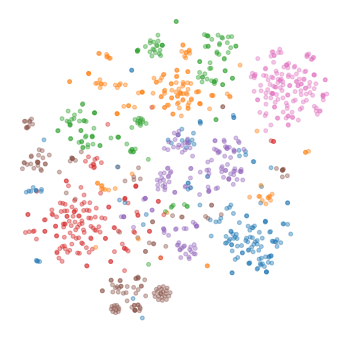

In [283]:
DF3 = Vectorizing (tfidf_vectorizer, My_data_Name_and_Description, My_data_Name_and_Description)
plot_TSNE(DF3["vectorized_data"])

In [62]:
DF3["vectorized_data"]

,005,01,06,10,1000,101,107,11,1100,12,122,13,14,15,16,17,18,19,196,1tb,20,200gm,21,22,23,24,25,27,28,2gb,30,300,310,33,36,3d,40,400,43,45,48,4gb,50,59,5th,5v,60,62,75,750,78,800,84,85,89,90,9a,aapno,abstract,ac750,adapter,adhesive,adidas,adsl,aero,air,akup,alfajr,allin,almond,aloevera,analog,andre,android,angel,animal,anodised,anti,antique,antiqueshop,apple,ar,arabian,arb,archies,aroma,art,artificial,artpiece,assorted,asus,attivo,avenue,baby,babyoye,background,bag,ball,balm,band,bank,base,basic,bath,battery,bazaar,bear,beautiful,bed,bedsheet,bee,beebay,beige,believe,bell,bella,berlin,bharatcraft,big,bird,birthday,bk,black,blanket,bleach,blue,bluetooth,blush,body,bodysuit,bonsai,bottle,bowl,box,boy,br,brass,brown,brush,bubble,bucket,buddha,bulb,cable,caliber,canvas,cap,card,care,carpet,cartoon,carved,case,casotec,casual,cell,ceramic,chair,charger,checkered,chinese,chokree,christmas,classic,clip,clock,club,cm,co2,coffee,collection,color,combo,comfort,comforter,compatible,computer,conditioner,connect,container,copper,core,corkscrew,cotonex,cotton,couple,cover,cow,craft,crafted,craftuno,cream,creation,creative,creme,crstl,crystal,crystle,crystle01,curtain,cushion,cute,cutter,dark,day,ddr2,decker,decor,decoration,decorative,deep,denim,deo,deodorant,design,dg,dia,diaper,digital,disney,dive,diviniti,diwan,dohar,dongli,door,doraemon,double,drawer,dress,drive,dry,dsl,dual,duvet,dv5,dv6,dynamic,edimax,edp,elegance,elephant,embroidered,enabled,engage,envy,ethnic,exotic,export,exporter,extender,extra,extract,eye,eyelet,face,facewash,facial,famous,fan,fantasy,fashion,fb,fern,fi,fiber,fit,flare,flavor,flexible,flippd,floral,floralina,fluid,fogg,food,force,frame,framed,franck,free,fruit,furnishingland,gallery,ganesh,ganesha,gateway,gathered,gb,gel,gen,geometric,gift,giftsthatwow,gigabit,girl,glass,glow,goddess,gold,golden,golmaalshop,good,grade,graphic,green,grey,gtw,guru,hair,hako,hamilton,hand,handcrafted,handicraft,handloom,handloomhub,handmade,hanging,happy,hard,hat,haveli,heart,high,hill,hmt,holder,home,honey,honour,hookah,hot,house,hp,hub,i3,ice,ideapad,idol,important,inch,independence,india,inflatable,intellect,intense,international,intex,iron,island,iw,jacadi,jaipur,jasmine,jewellery,jharoka,jrb,jug,juice,jump,jumpsuit,junction,kadhai,kalash,key,keyboard,kid,kidz,king,kit,kitchen,kliqvik,klub,kosher,krishna,kurta,la,lace,lal,lamp,lapguard,laptop,large,layered,leaf,league,led,legging,lemon,lemongrass,lenovo,letter,lid,life,light,line,linen,link,lip,lipstick,little,london,long,lord,lotion,love,luba,lucky,lunch,lx,mac,macbook,mache,magic,magnetic,magsafe,majesty,make,makeup,man,manicure,marble,maroon,marvel,massage,mat,maximum,mdf,medium,memore,men,mesleep,metal,metallino,milton,mini,mint,mixfruit,mkb,ml,mmull,mobile,modem,mom,monster,mouse,mug,multi,multicolor,multicolour,musician,n150,n300,n600,na,nail,nappy,natural,nc11,neck,nehp,neo,net,netgear,new,night,nike,nkp,north,notebook,nutcase,ocean,offspring,oil,orange,original,oxyglow,pa,pack,pad,painted,painting,pair,palito,pant,papaya,paper,paris,park,party,pavilion,pc,peacock,pen,perucci,phone,photo,piece,pink,pizza,pk,plain,plant,plastic,plated,playboy,plo,polish,polka,polo,polyester,pooja,port,portable,portia,pot,pouch,power,powered,premium,pride,print,printed,printland,prithish,pro,product,protector,pulse,purple,purpledip,purpose,pyjama,queen,quilt,radha,raga,raja,rajasthan,rajasthani,rajo,rama,range,raymond,reading,rectangular,red,rega,regular,reiki,religious,repair,replacement,rice,ro,rockmantra,rolling,romper,rose,round,router,royal,rrp,rt,ruchikainternational,runner,rythmx,sandalwood,santosh,sapatos,satin,science,se122103,sea,seater,self,series,service,set,sf,shampoo,shape,shaun,shea,sheet,shelf,shirt,shop,shopmania,shoppingtara,short,showpiece,silk,single,sipper,size,sized,skin,skmei,sleepsuit,small,smallest,smart,smartpro,smooth,soap,sofa,solid,sonata,sony,sovam,sparkling,spf,sport,spray,stainless,starting,statue,steel,step,stick,sticker,stone,strap,striped,studio,stylish,sun,

In [63]:
DF3["Ari_score"]

0.2783021732347971

In [64]:
DF3["Centroids"]

array([[ 2.16840434e-19, -8.67361738e-19,  6.50521303e-19, ...,
        -8.67361738e-19,  2.16840434e-19,  7.58941521e-19],
       [-1.62630326e-18, -1.73472348e-18,  6.50521303e-19, ...,
        -2.16840434e-18,  1.09667898e-03,  3.01553180e-03],
       [ 4.33680869e-19, -8.67361738e-19,  6.50521303e-19, ...,
        -1.30104261e-18,  8.67361738e-19,  1.08420217e-18],
       ...,
       [ 1.38037188e-03,  1.82787218e-03,  3.60477118e-03, ...,
        -1.73472348e-18,  1.93397387e-03,  6.50521303e-19],
       [ 3.25260652e-19, -8.67361738e-19,  6.50521303e-19, ...,
        -4.33680869e-19,  0.00000000e+00,  7.58941521e-19],
       [ 4.33680869e-19,  1.21298321e-02,  6.50521303e-19, ...,
        -4.33680869e-19,  1.08420217e-19,  7.58941521e-19]])

In [65]:
from sklearn.manifold import TSNE

    
transformed_centroid= TSNE(n_components=2,
            perplexity=6,
            init='pca',
            random_state=42).fit_transform(DF3['Centroids'])
transformed_centroid

array([[  -3.6938052,    6.4768777],
       [ -68.78771  ,  -92.201904 ],
       [-122.14508  ,   13.767202 ],
       [  49.353893 ,  -99.70869  ],
       [ 114.40648  ,   -0.6884613],
       [  61.828644 ,  105.25829  ],
       [ -56.41585  ,  112.546394 ]], dtype=float32)

In [66]:
df_X_dense = pd.DataFrame(data = X_dense, columns=Colonne)

In [67]:
import time



# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des tweets par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()
    print("ARI : ", ARI)


In [68]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

## Dimensional reduction

### Through a PCA

In [69]:
def PCA_reduction (X, N_components_ratio):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=N_components_ratio)
    X_projected = pca.fit_transform(X_scaled)


    return X_projected

In [70]:
X_dense_Projected  = PCA_reduction (df_X_dense , 0.95 )

In [71]:
# cumsum = np.cumsum(pca.explained_variance_ratio_)
# cumsum

In [72]:
sns.color_palette('tab10')
x_axis = X_projected[:, 0]
y_axis = X_projected[:, 1]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,  palette=['red', 'green', 'blue', 'orange'])

NameError: name 'X_projected' is not defined

In [ ]:
X_product_name_projected= PCA_reduction (df_product_name_bow_TfIf, 0.95 )
X_name_and_Description_projected= PCA_reduction (df_name_and_description_bow_cv, 0.95 )

In [ ]:
X_pn_and_D_projected= PCA_reduction (dfpnadnD, 0.95 )

NameError: name 'dfpnadnD' is not defined

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)
T_sne = TSNE(n_components=2,
            perplexity=30,
            init='pca',
        random_state=42).fit_transform(X_projected)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 14.851932764053345 seconds


In [ ]:
T_sne2 = TSNE(n_components=2,
            perplexity=30,
            init='pca',
        random_state=42).fit_transform(X_name_and_Description_projected)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 3503.0993123054504 seconds


In [ ]:
T_sne3 = TSNE(n_components=2,
            perplexity=30,
            init='pca',
        random_state=42).fit_transform(X_product_name_projected)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 3527.248298406601 seconds


In [ ]:
# df_bow_cv = pd.DataFrame(data = X.toarray(), columns=Col1)
# df_product_name_bow_cv = pd.DataFrame(data = X_product_name.toarray(), columns=Col2)
# df_name_and_description_bow_cv = pd.DataFrame(data = X_name_and_Description.toarray(), columns=Col3)
# df_name_and_Description_on_Product_name_bow_cv = pd.DataFrame(data = X_name_and_Description_on_Product_name.toarray(), columns=Col4)

In [ ]:
X_name_and_description_projected_from_cv = PCA_reduction(df_name_and_description_bow_cv, 0.95)

In [ ]:
T_sne7 = TSNE(n_components=2,
            perplexity=30,
            init='pca',
            random_state=42).fit_transform(df_name_and_description_bow_cv)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 12584.143668174744 seconds


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


0.2783021732347971

## graphing

Via LDA

In [76]:
data_filtered

,description,product_name,Name_and_Description
0,key feature elegance polyester multicolor abst...,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...
1,specification sathiyas cotton bath towel 3 bat...,sathiyas cotton bath towel,specification sathiyas cotton bath towel 3 bat...
2,key feature eurospa cotton terry face towel se...,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...
3,key feature santosh royal fashion cotton print...,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...
4,key feature jaipur print cotton floral king si...,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...
...,...,...,...
1045,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker,oren empower extra large self adhesive sticker...
1046,wallmantra large vinyl sticker sticker pack 1 ...,wallmantra large vinyl sticker sticker,wallmantra large vinyl sticker sticker pack 1 ...
1047,buy uberlyfe extra large pigmented polyvinyl f...,uberlyfe extra large pigmented polyvinyl film ...,buy uberlyfe extra large pigmented polyvinyl f...
1048,buy wallmantra medium vinyl sticker sticker r ...,wallmantra medium vinyl sticker sticker,buy wallmantra medium vinyl sticker sticker r ...


In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
corpus = data_filtered['Name_and_Description']
tf = tfidf_vectorizer.fit_transform(corpus)

# Instanciate LDA
lda = LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online', learning_offset=50.,random_state=42)

# Fitting the model
lda = lda.fit(tf)

# Applying the model
LDA_text = lda.transform(tf)

In [157]:
LDA_text

array([[0.01993136, 0.01992829, 0.88030953, ..., 0.01992663, 0.01992783,
        0.02002438],
       [0.02759214, 0.02759136, 0.83419397, ..., 0.02759604, 0.0275947 ,
        0.02784073],
       [0.02089072, 0.02089271, 0.87449005, ..., 0.02089031, 0.02091179,
        0.02102269],
       ...,
       [0.03409591, 0.03409615, 0.03410806, ..., 0.0341036 , 0.0340969 ,
        0.7954037 ],
       [0.03847588, 0.03847525, 0.0385063 , ..., 0.03848108, 0.03848697,
        0.76909588],
       [0.03536989, 0.03536971, 0.03539326, ..., 0.03537477, 0.03537343,
        0.78774943]])

In [95]:
tfidf_vectorizer.get_feature_names_out ()

array(['001', '005', '01', ..., 'zipper', 'zone', 'zyxel'], dtype=object)

In [102]:
type(lda.components_)

numpy.ndarray

In [103]:
lda.components_.shape

(7, 2338)

In [110]:
feature_names

NameError: name 'feature_names' is not defined

In [158]:
len(LDA_text)

1050

In [148]:
tablo = np.array([5, 5, 66, 44, 3, 0, 23, -5, 43, 5.4, 4])
tablo.argsort()[:-3:-1]

array([2, 3], dtype=int64)

In [154]:
nb_of_words = 10
for topic_idx, topic_words in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join((tfidf_vectorizer.get_feature_names_out()[i]) for i in topic_words.argsort()[:-nb_of_words - 1:-1]))

Topic 0:
jewellery vanity macbook apple ocean magsafe pouch makeup adapter glassware
Topic 1:
showpiece set cm dark krishna wall metal saucer led 23
Topic 2:
cm baby skin laptop cotton girl shape print color polyester
Topic 3:
gb beauty memory corkscrew drive face pen ddr2 range play
Topic 4:
router wireless dsl link guarantee n300 band 30 com flipkart
Topic 5:
sticker hookah flavor taste assorted excellent medium night vinyl arabian
Topic 6:
watch analog com flipkart genuine cash shipping buy free product


In [155]:
lda.components_[0].argsort()[56]

1742

In [113]:
tfidf_vectorizer.get_feature_names_out ()[342]

'application'

In [ ]:
listes = data.product_category_tree.unique().tolist()
categories  =[]
for tree in range(len(listes)):
    categories.append(listes[tree][:(listes[tree].find(">>"))])
set(categories)

AttributeError: 'DataFrame' object has no attribute 'product_category_tree'

In [204]:
LDA_text[9,:]

array([0.02682315, 0.02681024, 0.02749665, 0.02680772, 0.02681008,
       0.02681885, 0.83843332])

In [209]:
def plot_LDA(components):
    
       # Setting the data to plot
    labels = ['topic_{}'.format(i) for i in range(len(components))]
    frequencies = components

    # Plotting
    fig = plt.figure(figsize=(14, 6))
    plt.title("To which topic do I belong to? (LDA)", fontsize=20)
    plt.pie(frequencies,
                autopct='%.2f',
            )

    plt.legend(labels, loc='upper right', )
    # plt.show()
    # return fig



In [210]:
# Belonging to topics for first item
def pie_belonging (product_number):
    print(data['product_name'].iloc[product_number])
    plot_LDA(LDA_text[product_number,:])

TAG Heuer CAU1116.BA0858 Formula 1 Analog Watch  - For Boys, Men


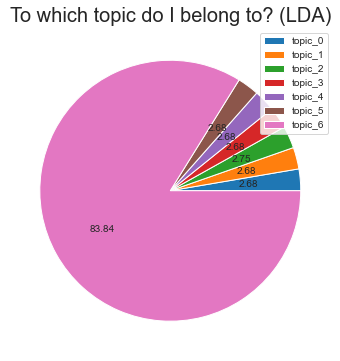

In [217]:
pie_belonging(9)

## 2nd PART : TEXT EMBEDDING

In [286]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_T['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]